Num knotsCreated spline of order 4 and knot length 1.000000
 100
Created spline of order 4, knot length 1.000000, from time 0.000000 to 100.000000; consisting of 103 knots
Spline fitting report:  Spline Fitting. Cost: 89.540434 -> 10.851628. Iterations: 11.



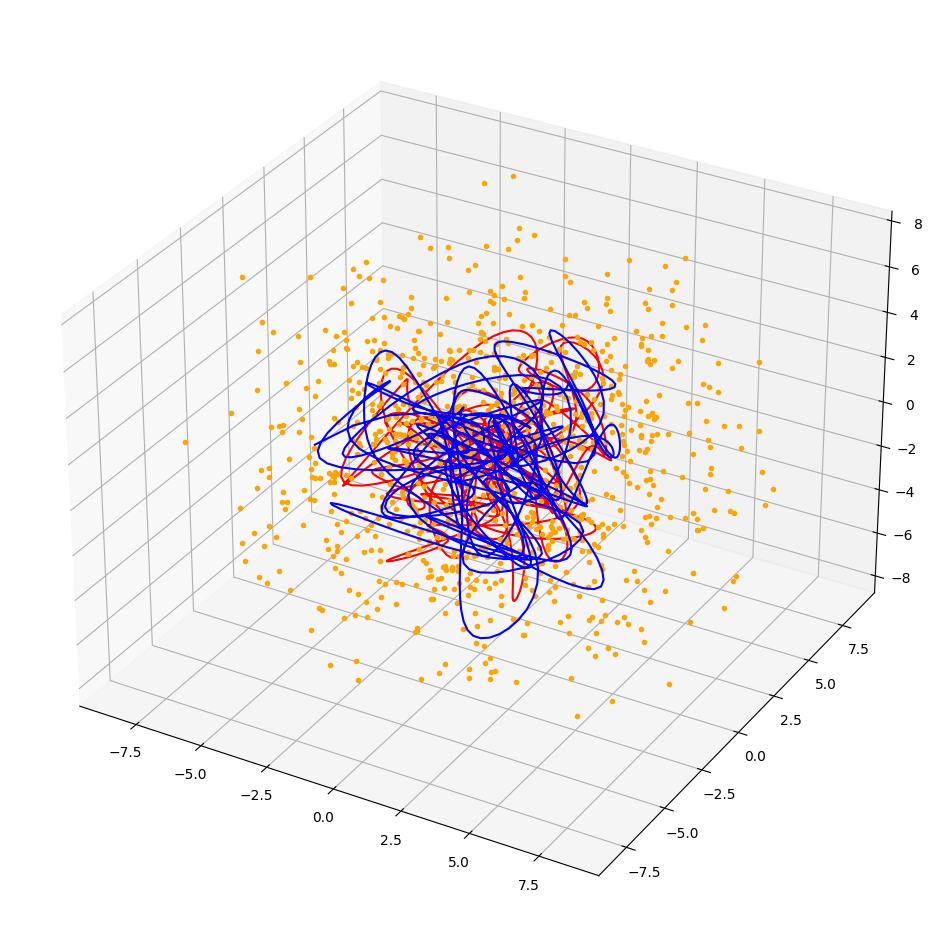

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np
from ceva import Ceva

order = 5
knotlength = 1

# Create a random spline
spline = Ceva(4, 1)
spline.genRandomTrajectory(100)
print("Num knots", spline.numKnots())

# Sample the spline for random poses
t = np.arange(0, 100, 0.1)
poses_gndtr = spline.getPose(t)[:, 1:]

# Add noise to the pose gndtr to get a measurement
poses_measu = np.array([list(poses_gndtr[n, [0, 1, 2]] + np.random.randint(-50, 50, size=3)/10 ) for n in range(poses_gndtr.shape[0])])

# Fit a spline
wp = list(np.full(len(t), 0.2))
wr = list(np.full(len(t), 0.01))
spline_est = Ceva(4, 1.0, t[0], t[-1])
report = spline_est.fitspline(t, poses_measu[:, [0, 1, 2]], poses_gndtr[:, [6, 3, 4, 5]], wp, wr, 1.0)

print("Spline fitting report: ", report)

# Sample the estimate spline
poses_estim = spline_est.getPose(t)[:, 1:]

# Plot the spline
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(poses_gndtr[:, 0], poses_gndtr[:, 1], poses_gndtr[:, 2], label='GNDTRUTH ', color='r')
ax.plot(poses_measu[:, 0], poses_measu[:, 1], poses_measu[:, 2], label='MEASURED ', color='orange', linestyle='', marker='.')
ax.plot(poses_estim[:, 0], poses_estim[:, 1], poses_estim[:, 2], label='ESTIMATED', color='blue')


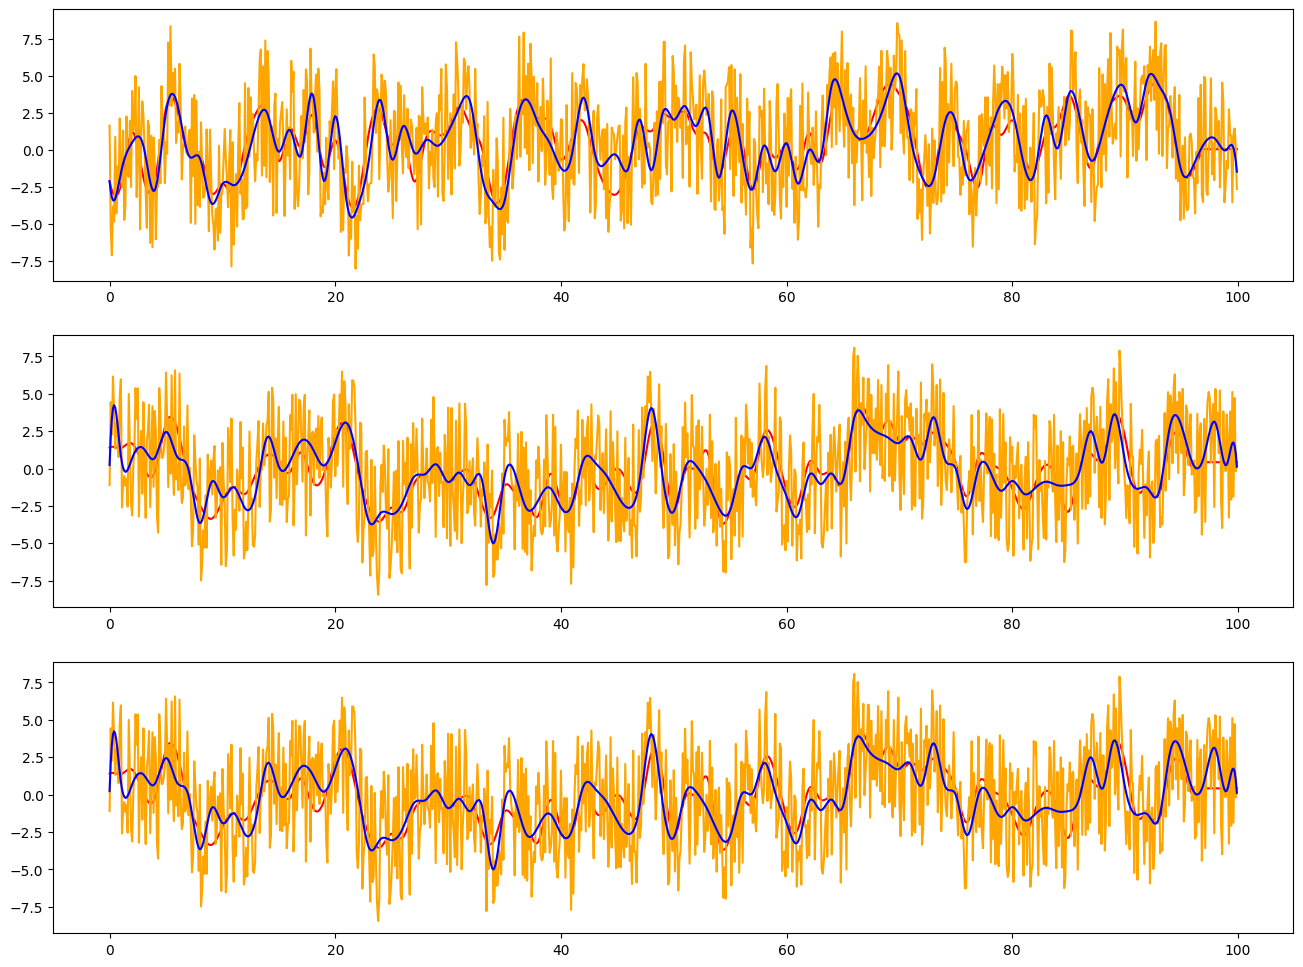

In [2]:
# Plot the spline
# fig = plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))

# x axis
axes[0].plot(t, poses_gndtr[:, 1], label='GNDTRUTH ', color='red')
axes[0].plot(t, poses_measu[:, 1], label='MEASURED ', color='orange')
axes[0].plot(t, poses_estim[:, 1], label='ESTIMATED', color='blue')

# x axis
axes[1].plot(t, poses_gndtr[:, 2], label='GNDTRUTH ', color='red')
axes[1].plot(t, poses_measu[:, 2], label='MEASURED ', color='orange')
axes[1].plot(t, poses_estim[:, 2], label='ESTIMATED', color='blue')

# y axis
axes[2].plot(t, poses_gndtr[:, 2], label='GNDTRUTH ', color='red')
axes[2].plot(t, poses_measu[:, 2], label='MEASURED ', color='orange')
axes[2].plot(t, poses_estim[:, 2], label='ESTIMATED', color='blue')